# Project Overview

This project is a redo of what I did for General Assembly. I believe now that I have worked hard at coding and done many other projects, then I can vastly improve the previous project. The dataset is a documentation of property sales in Brooklyn, NY from 2003-2017. It can be found on Kaggle https://www.kaggle.com/tianhwu/brooklynhomes2003to2017. The target variable that I want to predict is the sale price of the properties. 

# Importing Basic Libraries

In [94]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Initial Review of the Data

In [95]:
#Reading in of the dataset

brooklyn = pd.read_csv("brooklyn_sales_map.csv")

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
#The beginning structure of this dataset contains 390,883 rows and 111 columns worth of data

brooklyn.shape

(390883, 111)

In [97]:
#Here I am checking what the data types are for my potential explanatory variables
#Looks like most of them are numeric (integers or floats)
#There are definitely a few strings though that may have to be converted to dummy variables

brooklyn.dtypes

Unnamed: 0                   int64
borough                      int64
neighborhood                object
building_class_category     object
tax_class                   object
block                        int64
lot                          int64
easement                   float64
building_class              object
address                     object
apartment_number            object
zip_code                     int64
residential_units            int64
commercial_units             int64
total_units                  int64
land_sqft                  float64
gross_sqft                 float64
year_built                   int64
tax_class_at_sale            int64
building_class_at_sale      object
sale_price                 float64
sale_date                   object
year_of_sale                 int64
Borough                     object
CD                         float64
CT2010                     float64
CB2010                     float64
SchoolDist                 float64
Council             

In [98]:
#A brief look at the beginning of the dataset

brooklyn.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


In [99]:
#A brief look at the end of the dataset

brooklyn.tail()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
390878,390879,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,NaN,C0,364 LINDEN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,244.422014,2501.088819
390879,390880,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,NaN,C0,364 LINDEN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,244.422014,2501.088819
390880,390881,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,NaN,Z9,383 HARMAN STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,231.409296,2795.673780
390881,390882,3,3004,04 TAX CLASS 1 CONDOS,NaN,6886,1107,NaN,NaN,14 BAY 47TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390882,390883,3,3004,04 TAX CLASS 1 CONDOS,NaN,6886,1109,NaN,NaN,14 BAY 47 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#Here I am just dropping the first column of "unnamed" since it has no use 

brooklyn = brooklyn.drop(brooklyn.columns[0], axis=1)

In [101]:
#There are so many columns in this dataset that even trying to look at them as a whole seems inefficient

brooklyn.columns

Index(['borough', 'neighborhood', 'building_class_category', 'tax_class',
       'block', 'lot', 'easement', 'building_class', 'address',
       'apartment_number',
       ...
       'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID', 'FIRM07_FLA',
       'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object', length=110)

# Glossary of Terms

The full glossary is here https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=18v1

1. BOROUGH: The borough in which the tax lot is located. 

2. TAX BLOCK: The tax block in which the tax lot is located. Could be important.  

3. TAX LOT: The number of the tax lot. Each tax lot is unique within a tax block (see TAX BLOCK). 

4. COMMUNITY DISTRICT: The community district (CD) or joint interest area (JIA) for the tax lot. The city is divided into 59 community districts and 12 joint interest areas, which are large parks or airports that are not considered part of any community district. 

5. CENSUS TRACT: The 2010 census tract in which the tax lot is located.  

6. CENSUS BLOCK: The 2010 census block in which the tax lot is located. 

7. SCHOOL DISTRICT: The school district in which the tax lot is located. 

8. CITY COUNCIL DISTRICT: The city council district in which the tax lot is located. 

9. ZIP CODE: A ZIP code that is valid for one of the addresses assigned to the tax lot. 

10. FIRE COMPANY: The fire company that services the tax lot. 

11. POLICE PRECINCT: The police precinct in which the tax lot is located. 

12. HEALTH CENTER DISTRICT: The health center district in which the tax lot is located. 

13. HEALTH AREA: The health area in which the tax lot is located. 

14. SANITATION DISTRICT BORO: The borough of the sanitation district that services the tax lot. 

15. SANITATION DISTRICT NUMBER: The sanitation district that services the tax lot. 

16. SANITATION SUBSECTION: The subsection of the sanitation district that services the tax lot. 
 
17. ADDRESS: An address for the tax lot. 

18. ZONING DISTRICT 1: The zoning district classification of the tax lot. ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area.

19. ZONING DISTRICT 2: ZONING DISTRICT 2 represents the zoning classification occupying the second greatest percentage of the tax lot's area. 

20. ZONING DISTRICT 3: ZONING DISTRICT 3 represents the zoning classification occupying the third greatest percentage of the tax lot's area.

21. ZONING DISTRICT 4: ZONING DISTRICT 4 represents the zoning classification occupying the fourth greatest percentage of the tax lot's area.

22. COMMERCIAL OVERLAY 1: The commercial overlay assigned to the tax lot. COMMERCIAL OVERLAY 1 represents the commercial overlay occupying the greatest percentage of the lot area.

23. COMMERCIAL OVERLAY 2:  COMMERCIAL OVERLAY 2 represents the commercial overlay occupying the second largest percentage of the tax lot's area.

24. SPECIAL PURPOSE DISTRICT 1: The special purpose district assigned to the tax lot. SPECIAL PURPOSE DISTRICT 1 represents the special purpose district occupying the greatest percentage of the lot area.

25. SPECIAL PURPOSE DISTRICT 2: SPECIAL PURPOSE DISTRICT 2 represents the special purpose district occupying the second greatest percentage of the lot area.

26. SPECIAL PURPOSE DISTRICT 3: SPECIAL PURPOSE DISTRICT 3 represents the special purpose district occupying the smallest percentage of the lot area.

27. LIMITED HEIGHT DISTRICT: The limited height district assigned to the tax lot. A limited height district is superimposed on an area designated as an historic district by the Landmarks Preservation Commission.
 
28. SPLIT BOUNDARY INDICATOR: A code indicating whether the tax lot is split between multiple zoning features. The split boundary indicator is equal to “Y” if the tax lot has a value for ZONING DISTRICT 2, COMMERCIAL OVERLAY 2, or SPECIAL DISTRICT BOUNDARY 2.

29. BUILDING CLASS: A code describing the major use of structures on the tax lot.

30. LAND USE CATEGORY: A code for the tax lot's land use category. The Department of City Planning has created 11 land use categories and assigns each BUILDING CLASS to the most appropriate land use category.

31. NUMBER OF EASEMENTS: The number of unique easements on the tax lot. If the number of easements is zero, the tax lot has no easements

32. TYPE OF OWNERSHIP CODE: A code indicating type of ownership for the tax lot.

33. OWNER NAME: The name of the owner of the tax lot.

34. LOT AREA: Total area of the tax lot, expressed in square feet rounded to the nearest integer.

35. TOTAL BUILDING FLOOR AREA: The total gross area in square feet, except for condominium measurements which come from the Condo Declaration and are net square footage not gross.

36. COMMERCIAL FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use

37. RESIDENTIAL FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.

38. OFFICE FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.

39. RETAIL FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.

40. GARAGE FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for garage use.

41. STORAGE FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for storage or loft purposes. 

42. FACTORY FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for factory, warehouse or loft use.

43. OTHER FLOOR AREA: An estimate of the exterior dimensions of the portion of the structure(s) allocated for other than commercial, residential, office, retail, garage, storage, or factory use.

44. TOTAL BUILDING FLOOR AREA SOURCE CODE: A code indicating the methodology used to determine the tax lot's TOTAL BUILDING FLOOR AREA (BldgArea)

45. NUMBER OF BUILDINGS: The number of buildings on the tax lot.

46. NUMBER OF FLOORS: The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.

47. RESIDENTIAL UNITS: The sum of residential units in all buildings on the tax lot. If there are no residential units in the tax lot, this field will be zero.

48. TOTAL UNITS: The sum of residential and non-residential (offices, retail stores, etc.) units for all buildings on the tax lot.

49. LOT FRONTPAGE: The tax lot's frontage measured in feet.

50. LOT DEPTH: The tax lot's depth measured in feet.

51. BUILDING FRONTAGE: The building’s frontage along the street measured in feet.

52. BUILDING DEPTH: The building’s depth, which is the effective perpendicular distance, measured in feet.

53. EXTENSION CODE: A code identifying whether there is an extension on the lot or a garage other than the primary structure.

54. PROXIMITY CODE: A code describing the physical relationship of the building to neighboring buildings.

55. IRREGULAR LOT CODE: A code indicating whether the tax lot is irregularly shaped

56. LOT TYPE: A code indicating the location of the tax lot in relationship to another tax lot and/or the water.

57. BASEMENT TYPE: A code describing the building’s basement. 

58. ASSESSED LAND VALUE: The assessed land value for the tax lot.

59. ASSESSED TOTAL VALUE: The assessed total value for the tax lot.

60. EXEMPT TOTAL VALUE: The exempt total value, which is determined differently for each exemption program, is the dollar amount related to that portion of the tax lot that has received an exemption.

61. YEAR BUILT: The year construction of the building was completed.

62. YEAR ALTERED 1: If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began. If a building has been altered more than once, YEAR ALTERED 1 is the year of the second most recent alteration.

63. YEAR ALTERED 2: If a building has only been altered once, this field is blank. If a building has been altered more than once, YEAR ALTERED 2 is the year that the most recent alteration began.

64. HISTORIC DISTRICT NAME: The name of the Historic District that the tax lot is within.

65. LANDMARK STATUS: This value indicates whether the lot contains an individual landmark building, an interior landmark building, or both.

66. BUILT FLOOR AREA RATIO: The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.

67. MAXIMUM ALLOWABLE RESIDENTIAL FAR: The maximum allowable residential floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.

68. MAXIMUM ALLOWABLE COMMERICAL FAR: The maximum allowable commercial floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.

69. MAXIMUM ALLOWABLE COMMUNITY FACILITY: The maximum allowable community facility floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.

70. BORO CODE: The borough in which the tax lot is located.

71. BOROUGH, TAX BLOCK, & LOT: A concatenation of the borough code, tax block and tax lot

72. CONDOMINIUM NUMBER: The condominium number assigned to the complex

73. CENSUS TRACT 2: The 2010 census tract in which the tax lot is located.

74. X COORDINATE: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.

75. Y COORDINATE: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.

76. ZONING MAP: The Department of City Planning Zoning Map Number associated with the tax lot’s X and Y Coordinates.

77. ZONING MAP CODE: A code (Y) identifies a tax lot on the border of two or more zoning maps.
 
78. SANBORN MAP: The Sanborn Map Company map number associated with the tax block and lot.

79. TAX MAP: The Department of Finance paper tax map volume number associated with the tax block and lot. 

80. E-DESIGNATION NUMBER: The (E) designation number assigned to the tax lot. An (E) designation provides notice of the presence of an environmental requirement pertaining to potential hazardous materials contamination, high ambient noise levels or air emission concerns on a particular tax lot.

81. APPORTIONMENT BBL: The originating BBL (borough, block and lot) from the apportionment prior to the merge, split or property’s conversion to a condominium.

82. APPORTIONMENT DATE: The date of the apportionment.

83. PLUTO BASE: A code indicating whether the tax lot is in the PLUTO file, the MapPLUTO file with water areas included, and/or the MapPLUTO file that is clipped to the shoreline.

84. 2007 FLOOD INSURANCE: A value of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2007 Flood Insurance Rate Map.

85. 2015 FLOOD INSURANCE: A value of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2015 Preliminary Flood Insurance Rate Map.

86. VERSION NUMBER: The version number for this release of PLUTO.

87. CHANGED BY DCP: Flag indicating that City Planning has applied a correction to the record.

88. LATITUDE: The WGS 84 latitude of the latitude/longitude coordinate pair for the approximate location of the tax lot.

89. LONGITUDE: The WGS 84 longitude of the latitude/longitude coordinate pair for the approximate location of the tax lot

90. NOTES: A text field containing notes of importance to one or more lots

In [102]:
#Here I am looking at basic summary statistics for the numeric columns
#There are still so many columns that it's hard to get a macro sense of what's going on
#However, things like zip code and year built aren't really numeric, they should be converted
#Also, the average sale price looks very high, and the minimum sale price is 0 which seems suspicious

brooklyn.describe()

,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,...,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
count,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,3.908830e+05,...,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05
mean,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,2.970877e+03,...,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03
std,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,1.453960e+04,...,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04
min,3.0,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,3.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,2.143758,1.007072e-01
25%,3.0,1786.000000,21.000000,NaN,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,...,9.892368e+05,165334.750000,30611.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,238.997798,1.938904e+03
50%,3.0,4305.000000,45.000000,NaN,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,1.820000e+03,...,9.975955e+05,175906.000000,31506.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,249.411350,2.316886e+03
75%,3.0,6585.000000,94.000000,NaN,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,3.000000e+03,...,1.005059e+06,187140.000000,32005.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,283.169119,3.478477e+03
max,3.0,8955.000000,9133.000000,NaN,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,2.548000e+06,...,1.024202e+06,208406.000000,32605.000000,3.089321e+09,3.000000,1.0,1.0,7.000000,19861.521019,7.149338e+06


In [103]:
#Here I am looking at basic summary statistics for the non-numeric columns
#There's not much I can glean from this. There's too much noise

brooklyn.describe(include='object')

,neighborhood,building_class_category,tax_class,building_class,address,apartment_number,building_class_at_sale,sale_date,Borough,FireComp,...,Ext,IrrLotCode,HistDist,Landmark,ZoneMap,ZMCode,Sanborn,EDesigNum,APPDate,Version
count,390883,390800,383949,383949,390882,85616,390883,390883,303728,303480,...,66133,303706,19674,126,303728,6112,303710,3554,19259,303728
unique,64,88,10,183,226076,5734,187,5377,1,102,...,3,2,35,55,32,1,1542,115,2125,1
top,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1,C0,2 NORTHSIDE PIERS,4,C0,2006-08-31,BK,L170,...,G,N,Brooklyn Heights Historic District,PUBLIC SCHOOL 9 ANNEX,17a,Y,306 049,E-138,01/03/1992,17V1.1
freq,27279,106127,198969,39996,650,3681,38691,1133,303728,10093,...,44790,252341,3974,12,32613,6112,1047,688,238,303728


# Data Cleaning Round One

#### Dropping Irrelevant Columns

Dropping irrelevant columns will make my analysis much simpler. I had done this on the first project, but now knowing the definitions of all of the columns is making this easier

In [104]:
#I am dropping borough, Borough, and  BoroCode because this is all Brooklyn anyway
#I am dropping CD (community district) because there's only two values and they signify Brooklyn
#I am dropping Census Tract CT2010 and Census Block CB2010 because they're too "federal" 
#I am dropping PolicePrct and FireComp because I don't believe they are drivers of property values
#I am dropping HealthCent and HealthArea because I don't believe they are drivers of property values
#I am dropping SanitBoro because it's "3" for Brooklyn. No explanatory power
#I am dropping SanitDistr and SanitSub because I don't believe they are drivers of property values
#I am dropping Address and address because they're too granular
#I am dropping Overlay1 and Overlay2 because they are both better covered under zoning districts
#I am dropping SPDist1, SPDist2 and SPDist3 because they are all better covered under zoning districts
#I am dropping 'SplitZone' since it is better covered under zoning districts
#I am dropping 'ZipCode' since it's the same as zip_code
#I am dropping easement since it's the same as Easements
#I am dropping OwnerName because OwnerType is a better indicator
#I am dropping AreaSource because I don't need the source of calculation. Just the calculations themselves. 
#I am dropping Extension Code Ext because that's not going to drive property values in either direction
#I am dropping IrrLotCode because the shape of a lot is not that important
#I am dropping LotType because the information it shows is not very significant
#I am dropping BsmtCode because the type of basement is not that important 
#I am dropping Historic District Name HistDist because the landmark status is more important
#I am dropping 'BuiltFAR' since it's better used in other variables
#I am dropping 'BBL' since it's all Brooklyn
#I am dropping 'CondoNo' since that's too granular
#I am dropping Census Tract 2 (Tract2010) for the same reason as CT2010
#I am dropping Xcoord and YCoord because we're looking locally, not globally 
#I am dropping ZoneMap since it's the same as X and Y coordinates 
#I am dropping ZMCode since it's the same idea as ZoneMap
#I am dropping Sanborn since it's all Brooklyn
#I am dropping TaxMap since it's all Brooklyn
#I am dropping APPBBL since it's the same as BBL
#I am dropping apportionment date (APPDate) since that's irrelevant
#I am dropping DTM BASE MAP INDICATOR (PLUTOMapID) since that's irrelevant
#I am dropping 2007 flood insurance (FIRM07) since although flooding could be important, this isn't Florida
#I am dropping 2015 flood insurance (PFIRM15_Flag) for the same reason as 2007 
#I am dropping Version since it's related to PLUTO
#I am dropping apartment number for the same reason I dropped Condo Number
#I am dropping MAPPLUTO_F for the same reason I dropped PLUTOMapID
#I am dropping block because that's too granular 
#I am dropping neighborhood since that's too granular
#I am dropping SHAPE_Area and SHAPE_Leng because there are no definitions for them



brooklyn = brooklyn.drop(['borough', 'Borough', 'BoroCode', 'CD', 'CT2010', 'CB2010', 'FireComp',
                         'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro', 'SanitDistr',
                         'SanitSub', 'Address', 'address', 'Overlay1', 'Overlay2', 'SPDist1', 
                         'SPDist2', 'SPDist3', 'SplitZone', 'ZipCode', 'easement', 'OwnerName',
                         'AreaSource', 'Ext', 'IrrLotCode', 'LotType', 'BsmtCode', 'HistDist',
                         'BuiltFAR', 'BBL', 'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap',
                         'ZMCode', 'Sanborn', 'TaxMap', 'APPBBL', 'APPDate', 'PLUTOMapID', 'FIRM07_FLA',
                         'PFIRM15_FL', 'Version', 'apartment_number', 'MAPPLUTO_F', 'block',
                         'neighborhood', 'SHAPE_Area', 'SHAPE_Leng'], axis = 'columns')

#### Checking for Null Values

In [105]:
#Thankfully there aren't any null values for sale price
#However, there are quite a few columns with many null values

brooklyn.isna().sum() 

building_class_category        83
tax_class                    6934
lot                             0
building_class               6934
zip_code                        0
residential_units               0
commercial_units                0
total_units                     0
land_sqft                       0
gross_sqft                      0
year_built                      0
tax_class_at_sale               0
building_class_at_sale          0
sale_price                      0
sale_date                       0
year_of_sale                    0
SchoolDist                  87195
Council                     87155
ZoneDist1                   87169
ZoneDist2                  375768
ZoneDist3                  390697
ZoneDist4                  390880
LtdHeight                  385762
BldgClass                   87177
LandUse                     88172
Easements                   87155
OwnerType                  337389
LotArea                     87155
BldgArea                    87155
ComArea       

In [106]:
#Here I am going to drop all columns that have 300,000+ null values. To me that means these columns aren't that important 
#I also dropped ZoneDist1 since all the other zones were dropped so Zone 1 can't offer any significance

brooklyn = brooklyn.drop(['ZoneDist2','ZoneDist3', 'ZoneDist4', 
                          'LtdHeight', 'OwnerType', 'EDesigNum',
                          'Landmark', 'ZoneDist1'], axis = 'columns')

In [107]:
#Here I am checking for null values even further since there are still many columns of data

brooklyn.isna().sum()

building_class_category       83
tax_class                   6934
lot                            0
building_class              6934
zip_code                       0
residential_units              0
commercial_units               0
total_units                    0
land_sqft                      0
gross_sqft                     0
year_built                     0
tax_class_at_sale              0
building_class_at_sale         0
sale_price                     0
sale_date                      0
year_of_sale                   0
SchoolDist                 87195
Council                    87155
BldgClass                  87177
LandUse                    88172
Easements                  87155
LotArea                    87155
BldgArea                   87155
ComArea                    87155
ResArea                    87155
OfficeArea                 87155
RetailArea                 87155
GarageArea                 87155
StrgeArea                  87155
FactryArea                 87155
OtherArea 

#### Checking for Duplicate Columns

When I did this project the first time around, there were several duplicate columns in the csv file. I re-downloaded the file from Kaggle and it looks like it was cleaned up since it was first posted. There are no longer strict duplicate columns in the file. There certainly can still be duplicate columns that are named slightly differently (one lower case one higher case)

In [108]:
brooklyn = brooklyn.loc[:,~brooklyn.columns.duplicated()]

In [109]:
brooklyn.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [110]:
#There aren't any duplicate columns directly (same design), but indirectly (same value) there are
#YearBuilt and year_built are the same. I will drop YearBuilt since that has many null values
#Easements is the same as easements, which I dropped above
#UnitsRes is the same as residential_units but has many null values so I dropped it
#UnitsTotal is the same as total_units but has many null values so I dropped it
#BldgClass, building_class, building_class_category and building_class_at_sale are alike but the first 3 have many null values
#tax_class and tax_class_at_sale are the same, but the former has many null values
#sale_date is the same as year_of_sale but has inconsistent data so I dropped it
#BldgArea is the same as gross_sqft but with many null values so I dropped it
#LotArea is the same as land_sqft but with many null values so I dropped it

brooklyn = brooklyn.drop(['YearBuilt','Easements', 'UnitsRes', 
                          'UnitsTotal', 'BldgClass', 'building_class',
                          'building_class_category', 'tax_class', 
                          'sale_date', 'BldgArea', 'LotArea'], axis = 'columns')

In [111]:
#After some initial cleaning I've reduced the dataset from 111 columns to 39. 
#That's a drastic drop just based on simple cleaning

brooklyn.shape

(390883, 39)

# First Pass Model

I think it can be a good thing to do a rough draft of your model. That way you can see how much work you need to do to clean it up and make other adjustments

In [112]:
#I am only using numeric data for the first-pass model as a matter of simplicity

#I do believe there are categorical variables that will be useful as explanatory variables in an improved model

brooklyn_numeric = brooklyn[['sale_price', 'residential_units', 'commercial_units', 'total_units', 'land_sqft', 
                             'gross_sqft', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 
                             'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'LotFront', 'LotDepth', 
                             'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot', 'ResidFAR', 
                             'CommFAR', 'FacilFAR']].dropna()

In [113]:
#Separating the variables between X and y

X = brooklyn_numeric.drop('sale_price', axis='columns')
y = brooklyn_numeric.loc[:, 'sale_price']

In [114]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish
#I am using the 80/20 split based on conventional use

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [115]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.14358597205908008
0.10364810889644971


#### First Impressions

The model does indeed perform better than the null model, however the training model only captured 15% of the variance and the test model captured even less variance at 11%. So, even though my model performed better than the null model, its performance was so poor that it's not worth touting. I believe my model is suffering from both high bias and high variance. It has high bias because it performed so poorly on both the training set and test set. It has high variance because it performed better on the training set than the test set.

# Further Data Cleaning

The most important value is the actual sales price of these homes. There were some funky values on the first dataset so I am going to check them again.

In [117]:
#It looks like "0" shows up over 140,000 times. There are also values like 10 and 16.
#These values seem nonsensical to me in terms of the value of a home
#I am going to drop these values

brooklyn['sale_price'].value_counts()  

0.0          140143
10.0           3465
450000.0       2420
400000.0       2230
600000.0       2216
550000.0       2100
650000.0       2058
350000.0       1976
300000.0       1962
500000.0       1809
700000.0       1744
750000.0       1732
250000.0       1683
200000.0       1582
800000.0       1489
425000.0       1353
475000.0       1255
900000.0       1254
850000.0       1230
375000.0       1214
575000.0       1159
150000.0       1135
525000.0       1127
325000.0       1115
1200000.0      1103
625000.0       1059
360000.0       1013
950000.0        992
420000.0        978
560000.0        977
              ...  
598750.0          1
404165.0          1
808333.0          1
3233576.0         1
404200.0          1
1616981.0         1
202127.0          1
404283.0          1
225615.0          1
404065.0          1
404056.0          1
404038.0          1
1944000.0         1
807440.0          1
201861.0          1
201877.0          1
403755.0          1
100940.0          1
311250.0          1


In [118]:
brooklyn = brooklyn[brooklyn.sale_price > 16]

In [119]:
brooklyn['sale_price'].value_counts() 

450000.0      2420
400000.0      2230
600000.0      2216
550000.0      2100
650000.0      2058
350000.0      1976
300000.0      1962
500000.0      1809
700000.0      1744
750000.0      1732
250000.0      1683
200000.0      1582
800000.0      1489
425000.0      1353
475000.0      1255
900000.0      1254
850000.0      1230
375000.0      1214
575000.0      1159
150000.0      1135
525000.0      1127
325000.0      1115
1200000.0     1103
625000.0      1059
360000.0      1013
950000.0       992
420000.0       978
675000.0       977
560000.0       977
460000.0       964
              ... 
2708705.0        1
1878671.0        1
939336.0         1
469670.0         1
58711.0          1
5418000.0        1
234851.0         1
677261.0         1
56719.0          1
21175.0          1
469580.0         1
2054000.0        1
1877747.0        1
338298.0         1
938743.0         1
7510000.0        1
2706466.0        1
15020230.0       1
938800.0         1
169176.0         1
10574.0          1
370201.0    

In [120]:
#There still seems to be some funky values
#What I'm going to do is check the median prices of the year of sales in the dataset
#That will help determine which values to drop from the dataset

brooklyn['year_of_sale'].value_counts()                     

2005    23067
2004    23015
2003    20592
2006    20411
2007    18074
2015    15805
2014    15750
2013    15622
2017    15552
2016    15287
2008    14154
2012    13658
2011    13003
2010    11563
2009    10863
Name: year_of_sale, dtype: int64

According to this article (https://ny.curbed.com/2019/12/13/21009872/nyc-home-value-2010s-manhattan-apartments), the median home sale price in Brookyln from 2010-2017 was as follows:
    
    2010: $463,000
    
    2011: $454,000
    
    2012: $450,000
    
    2013: $515,000
    
    2014: $520,000
    
    2015: $605,000
    
    2016: $659,000
    
    2017: $770,000

In [121]:
#I could not find data before 2010. We can make the assumption that property was cheaper, but not so cheap
#I am going to start my analysis at $200,000

brooklyn = brooklyn[brooklyn.sale_price >= 200000]

In [122]:
brooklyn['sale_price'].value_counts() 

450000.0       2420
400000.0       2230
600000.0       2216
550000.0       2100
650000.0       2058
350000.0       1976
300000.0       1962
500000.0       1809
700000.0       1744
750000.0       1732
250000.0       1683
200000.0       1582
800000.0       1489
425000.0       1353
475000.0       1255
900000.0       1254
850000.0       1230
375000.0       1214
575000.0       1159
525000.0       1127
325000.0       1115
1200000.0      1103
625000.0       1059
360000.0       1013
950000.0        992
420000.0        978
675000.0        977
560000.0        977
460000.0        964
430000.0        957
               ... 
345000000.0       1
233988.0          1
703356.0          1
336900.0          1
29950000.0        1
467950.0          1
10780000.0        1
467940.0          1
233969.0          1
467926.0          1
467925.0          1
935842.0          1
467905.0          1
850550.0          1
336818.0          1
935771.0          1
673572.0          1
673533.0          1
1018248.0         1


In [123]:
#The lowest sale price is $200,000 which is the floor we set

brooklyn['sale_price'].min()

200000.0

In [124]:
#The highest sale price is 499,401,179. There certainly could be homes like that for sale, but they are extremely rare

brooklyn['sale_price'].max()

499401179.0

In [125]:
#Not only are their outliers on the lower end of the price range, but on the upper end as well
#I am going to drop all prices above $5 million

brooklyn = brooklyn[brooklyn.sale_price <= 5000000]

In [126]:
brooklyn['sale_price'].value_counts() 

450000.0     2420
400000.0     2230
600000.0     2216
550000.0     2100
650000.0     2058
350000.0     1976
300000.0     1962
500000.0     1809
700000.0     1744
750000.0     1732
250000.0     1683
200000.0     1582
800000.0     1489
425000.0     1353
475000.0     1255
900000.0     1254
850000.0     1230
375000.0     1214
575000.0     1159
525000.0     1127
325000.0     1115
1200000.0    1103
625000.0     1059
360000.0     1013
950000.0      992
420000.0      978
675000.0      977
560000.0      977
460000.0      964
430000.0      957
             ... 
3699200.0       1
672800.0        1
935468.0        1
2693271.0       1
2693164.0       1
673250.0        1
3741127.0       1
3741000.0       1
526250.0        1
233810.0        1
233806.0        1
467604.0        1
1346126.0       1
673059.0        1
467600.0        1
673053.0        1
467586.0        1
467584.0        1
336509.0        1
1346000.0       1
333250.0        1
935111.0        1
672961.0        1
3740388.0       1
1687500.0 

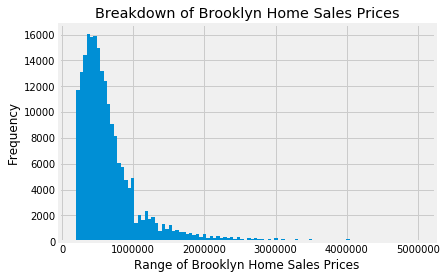

In [127]:
#Here is a histogram for sale_price
#This helps with checking the distribution of data and this is definitely skewed right

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

In [128]:
#It looks like the data still has some outlier on the upper end
#I will reduce the maximum price to $2 million now

brooklyn = brooklyn[brooklyn.sale_price <= 2000000]

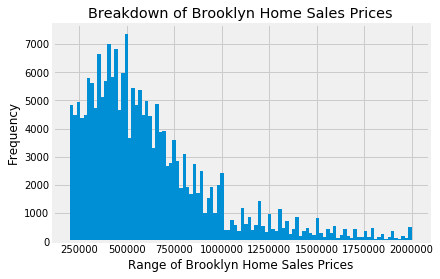

In [129]:
#Here is a historgram for sale_price
#This looks better, but is still skewed to the right

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

In [130]:
brooklyn = brooklyn[brooklyn.sale_price <= 1000000]

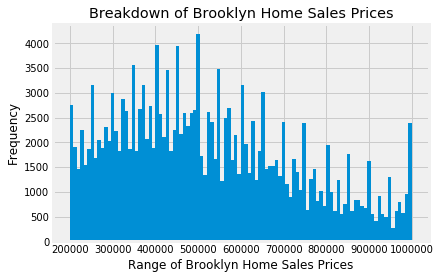

In [131]:
#This looks more closely to a normal distribution
#I am going to stick with this for now

brooklyn.loc[:,"sale_price"].plot(kind='hist', bins=100)
plt.xlabel("Range of Brooklyn Home Sales Prices")
plt.title("Breakdown of Brooklyn Home Sales Prices");

#### Filling in Missing/Abnormal Values of Other Variables

In [132]:
#let's double check how many missing values there are and I will fill them in accordingly

brooklyn.isna().sum()

lot                           0
zip_code                      0
residential_units             0
commercial_units              0
total_units                   0
land_sqft                     0
gross_sqft                    0
year_built                    0
tax_class_at_sale             0
building_class_at_sale        0
sale_price                    0
year_of_sale                  0
SchoolDist                43614
Council                   43604
LandUse                   43767
ComArea                   43604
ResArea                   43604
OfficeArea                43604
RetailArea                43604
GarageArea                43604
StrgeArea                 43604
FactryArea                43604
OtherArea                 43604
NumBldgs                  43604
NumFloors                 43604
LotFront                  43604
LotDepth                  43604
BldgFront                 43604
BldgDepth                 43604
ProxCode                  43613
AssessLand                43604
AssessTo

In [133]:
brooklyn.shape

(180867, 39)

In [134]:
brooklyn = brooklyn.dropna()

In [135]:
brooklyn.shape

(137099, 39)

In [136]:
brooklyn.isna().sum()

lot                       0
zip_code                  0
residential_units         0
commercial_units          0
total_units               0
land_sqft                 0
gross_sqft                0
year_built                0
tax_class_at_sale         0
building_class_at_sale    0
sale_price                0
year_of_sale              0
SchoolDist                0
Council                   0
LandUse                   0
ComArea                   0
ResArea                   0
OfficeArea                0
RetailArea                0
GarageArea                0
StrgeArea                 0
FactryArea                0
OtherArea                 0
NumBldgs                  0
NumFloors                 0
LotFront                  0
LotDepth                  0
BldgFront                 0
BldgDepth                 0
ProxCode                  0
AssessLand                0
AssessTot                 0
ExemptLand                0
ExemptTot                 0
YearAlter1                0
YearAlter2          

In [137]:
#There are 25,237 instances of 0 units in these properties

brooklyn['total_units'].value_counts() 

2      49757
1      28265
0      25327
3      21151
4       4895
6       4034
5       1182
8       1133
7        436
9        180
12       118
10       110
16        87
11        37
13        23
15        22
20        19
18        19
24        15
14        14
30        14
23        13
36        11
19        11
61        10
32        10
33         8
42         8
25         8
72         8
       ...  
128        1
528        1
123        1
287        1
74         1
370        1
111        1
108        1
101        1
99         1
91         1
85         1
84         1
82         1
79         1
462        1
73         1
161        1
71         1
68         1
63         1
57         1
53         1
46         1
424        1
120        1
38         1
37         1
420        1
168        1
Name: total_units, Length: 110, dtype: int64

In [138]:
brooklyn = brooklyn[brooklyn.total_units > 0]

In [139]:
brooklyn.shape

(111772, 39)

In [140]:
brooklyn['land_sqft'].value_counts() 

2000.0     19190
2500.0      8236
1800.0      5579
3000.0      2844
4000.0      2555
1600.0      2440
2003.0      2365
1900.0      1745
2200.0      1659
1667.0      1415
1875.0      1357
2400.0      1071
1500.0      1006
2600.0       877
2100.0       848
1950.0       815
1700.0       798
2300.0       743
1750.0       666
5000.0       622
2250.0       592
2800.0       571
2504.0       564
1933.0       544
2700.0       531
2050.0       492
2667.0       449
2150.0       447
1850.0       400
2900.0       391
           ...  
3431.0         1
3084.0         1
12892.0        1
4204.0         1
6973.0         1
11880.0        1
13187.0        1
3507.0         1
5571.0         1
18195.0        1
3309.0         1
458.0          1
600.0          1
4553.0         1
3814.0         1
2985.0         1
5581.0         1
4569.0         1
827.0          1
3872.0         1
5585.0         1
3876.0         1
16820.0        1
3429.0         1
5466.0         1
13500.0        1
4567.0         1
6392.0        

In [141]:
brooklyn['land_sqft'].min()

0.0

In [142]:
brooklyn = brooklyn[brooklyn.land_sqft > 0]

In [143]:
brooklyn.shape

(111768, 39)

In [144]:
brooklyn['year_built'].value_counts() 

1920    12905
1930    12255
1925    11983
1910    11851
1899    10020
1901     7568
1931     6818
1960     4249
1940     3326
1915     2621
1905     2584
1935     2415
1955     2337
1950     2094
2005     1698
1945     1603
1965     1561
2004     1534
2006      954
2007      867
1970      824
2003      799
2008      623
2002      487
1900      413
1927      385
2009      353
1928      297
1924      260
1990      254
        ...  
1895        8
1977        8
1982        7
1974        7
1973        7
1971        7
1944        6
1966        6
1890        5
1981        4
1898        4
1885        4
1947        4
1902        4
1892        4
1943        3
1848        2
1850        1
1942        1
1888        1
1866        1
1880        1
1869        1
1891        1
1380        1
1864        1
1875        1
1874        1
1842        1
1849        1
Name: year_built, Length: 138, dtype: int64

In [145]:
brooklyn['year_built'].min()

0

In [146]:
brooklyn = brooklyn[brooklyn.year_built > 0]

In [147]:
brooklyn.shape

(111699, 39)

In [148]:
brooklyn['year_of_sale'].value_counts() 

2004    13288
2005    12846
2006    11387
2003    11375
2007     8267
2013     6479
2014     6170
2008     5860
2015     5665
2012     5650
2010     5211
2016     5050
2011     4957
2009     4779
2017     4715
Name: year_of_sale, dtype: int64

# Second Pass Model

Let's see how much cleaning up of the sales price data has affected my model

In [149]:
#I am only using numeric data for the first-pass model as a matter of simplicity

#I do believe there are categorical variables that will be useful as explanatory variables in an improved model

brooklyn_numeric2 = brooklyn[['sale_price', 'residential_units', 'commercial_units', 'total_units', 'land_sqft', 
                             'gross_sqft', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 
                             'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'LotFront', 'LotDepth', 
                             'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot', 'ResidFAR', 
                             'CommFAR', 'FacilFAR']].dropna()

In [150]:
#Separating the variables between X and y

X = brooklyn_numeric2.drop('sale_price', axis='columns')
y = brooklyn_numeric2.loc[:, 'sale_price']

In [151]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [152]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.06290897765229309
0.06016808532310836


#### First Impressions

The model is basically worse than the first go around in terms of predictability. However, the training and test sets both had an R-Squared of .06. So, we have high bias, low variance, and a case of underfitting.  

# Data Cleaning Round Three

#### Converting Numeric Data Types into Strings

Many variables in the dataset are incorrectly formatted as integers or floats when they are actually strings. They are categorical variables. I believe some of these values could be useful to my model and help correct the underfitting problem.

In [154]:
brooklyn.dtypes

lot                         int64
zip_code                    int64
residential_units           int64
commercial_units            int64
total_units                 int64
land_sqft                 float64
gross_sqft                float64
year_built                  int64
tax_class_at_sale           int64
building_class_at_sale     object
sale_price                float64
year_of_sale                int64
SchoolDist                float64
Council                   float64
LandUse                   float64
ComArea                   float64
ResArea                   float64
OfficeArea                float64
RetailArea                float64
GarageArea                float64
StrgeArea                 float64
FactryArea                float64
OtherArea                 float64
NumBldgs                  float64
NumFloors                 float64
LotFront                  float64
LotDepth                  float64
BldgFront                 float64
BldgDepth                 float64
ProxCode      

In [155]:
brooklyn = brooklyn.astype({'lot':str, 'zip_code':str, 'year_of_sale':str, 'tax_class_at_sale':str, 'YearAlter1':str,
                            'YearAlter2':str,  'year_built':str, 'ProxCode':str, 'LandUse':str, 
                            'Council':str, 'SchoolDist':str})

In [156]:
#Here I am double checking that all variables are formatted correctly

brooklyn.dtypes

lot                        object
zip_code                   object
residential_units           int64
commercial_units            int64
total_units                 int64
land_sqft                 float64
gross_sqft                float64
year_built                 object
tax_class_at_sale          object
building_class_at_sale     object
sale_price                float64
year_of_sale               object
SchoolDist                 object
Council                    object
LandUse                    object
ComArea                   float64
ResArea                   float64
OfficeArea                float64
RetailArea                float64
GarageArea                float64
StrgeArea                 float64
FactryArea                float64
OtherArea                 float64
NumBldgs                  float64
NumFloors                 float64
LotFront                  float64
LotDepth                  float64
BldgFront                 float64
BldgDepth                 float64
ProxCode      

#### Value Counts of Categorical Variables

Before I try to convert any of the categorical variables into a dummy variable I want to check how they are dispersed. I don't want to overload my model with hundreds or thousands of dummy variables. I will either have to eliminate some variables or create levels in them to reduce their specificity.

In [157]:
#There are 39 unique values for zip code. That is quite a lot.

brooklyn['zip_code'].nunique() 

39

In [158]:
#There are 1029 unique values for lot. That is quite a lot.
#I am going to drop lot from the dataset

brooklyn['lot'].nunique() 

1029

In [159]:
#There are 137 unique values for year built. That is quite a lot. But it's important so I will make some levels

brooklyn['year_built'].nunique() 

137

In [160]:
#There are 3 unique values for tax class at sale. That's a great amount to work with

brooklyn['tax_class_at_sale'].nunique() 

3

In [161]:
#There are 116 unique values for building class at sale. That is quite a lot.
#I am going to drop it since it's better shown through units and area

brooklyn['building_class_at_sale'].nunique() 

116

In [162]:
#There are 15 unique values for year of sale. That's ok, but will make levels

brooklyn['year_of_sale'].nunique() 

15

In [163]:
#There are 12 unique values for school district. 
#I'm going to drop it once I fix zip code

brooklyn['SchoolDist'].nunique() 

12

In [164]:
#There are 16 unqiue values for council. 
#I'm going to drop it once I fix zip code

brooklyn['Council'].nunique() 

16

In [165]:
#There are 11 unqiue values for land use.
#I am going to drop it for now, but maybe add it back later if the model still has issues

brooklyn['LandUse'].nunique() 

11

In [166]:
#There are 4 unqiue values for Prox Code. That's a great amount to work with

brooklyn['ProxCode'].nunique() 

4

In [167]:
#There are 70 unqiue values for Year Altered 1. That's a lot. Will make levels

brooklyn['YearAlter1'].nunique() 

70

In [168]:
#There are 35 unqiue values for Year Altered 2. That's a lot. Will make levels

brooklyn['YearAlter2'].nunique() 

35

In [169]:
brooklyn['year_built'].value_counts()

1920    12905
1930    12255
1925    11983
1910    11851
1899    10020
1901     7568
1931     6818
1960     4249
1940     3326
1915     2621
1905     2584
1935     2415
1955     2337
1950     2094
2005     1698
1945     1603
1965     1561
2004     1534
2006      954
2007      867
1970      824
2003      799
2008      623
2002      487
1900      413
1927      385
2009      353
1928      297
1924      260
1990      254
        ...  
1977        8
1895        8
1974        7
1982        7
1971        7
1973        7
1944        6
1966        6
1890        5
1898        4
1892        4
1947        4
1981        4
1902        4
1885        4
1943        3
1848        2
1864        1
1942        1
1842        1
1891        1
1380        1
1875        1
1850        1
1888        1
1869        1
1849        1
1880        1
1866        1
1874        1
Name: year_built, Length: 137, dtype: int64

In [170]:
brooklyn['year_built'].min()

'1380'

In [171]:
brooklyn['year_built'].max()

'2016'

In [172]:
brooklyn = brooklyn[brooklyn.year_built > '1800']

In [173]:
brooklyn['year_built'].min()

'1842'

In [174]:
#Here I am creating a function to convert the years built into four distinct eras of being built

def era_Built(x):
    if x < "1900":
        return "1850"
    elif "1899" < x < "1951":
        return "1900"
    elif "1950" < x < "2000":
        return "1950"
    else: return "2000"


brooklyn["year_built"] = brooklyn["year_built"].apply(era_Built)
print(brooklyn["year_built"])

29687     1900
29688     1900
29689     1900
29691     1900
29692     1900
29693     1900
29694     2000
29695     1900
29696     1900
29699     1900
29700     1900
29701     1900
29702     1900
29703     1850
29704     1900
29705     1950
29706     1900
29707     1900
29709     1900
29710     1900
29711     1900
29712     1900
29714     1900
29715     1900
29717     1900
29719     1900
29720     1900
29722     1900
29723     1900
29724     1900
          ... 
390782    1900
390785    1900
390786    1900
390787    1900
390788    1900
390791    1900
390794    1900
390795    1900
390796    1900
390798    1900
390799    1900
390800    1900
390801    1900
390803    1900
390806    1900
390808    1900
390809    1900
390840    1900
390842    1900
390843    1900
390845    1900
390846    1900
390847    1900
390848    1900
390854    1900
390858    1900
390868    1900
390869    1900
390878    2000
390879    2000
Name: year_built, Length: 111683, dtype: object


In [175]:
brooklyn["year_built"].value_counts()

1900    81629
1950    11846
1850    10058
2000     8150
Name: year_built, dtype: int64

Here is a map of Brooklyn based on zip codes. I am going to create regions of zip codes instead of coding for all 39 zip codes http://brooklynproperty.com/content/ZipCodes.htm

In [176]:
brooklyn["zip_code"].value_counts()

11234    9386
11208    7503
11221    7336
11207    7163
11236    6726
11233    5931
11203    4710
11229    4675
11223    3581
11214    3435
11220    3357
11204    3316
11216    3310
11210    3207
11228    3180
11212    2928
11235    2899
11209    2587
11213    2373
11230    2294
11226    2266
11218    2260
11219    2255
11237    2109
11206    2061
11215    1467
11225    1300
11238    1236
11211    1051
11232    1049
11224    1044
11222    1033
11205    1001
11231     681
11217     456
11239     286
11201     190
11249      28
11416      13
Name: zip_code, dtype: int64

In [177]:
#Zip code 11416 is actually Queens, not Brooklyn. So I am going to drop that first.

brooklyn = brooklyn[brooklyn.zip_code != '11416']

In [178]:
#Here I am creating a function to convert the zip codes into four distinct regions

def zip_Region(x):
    if x in ["11214", "11204", '11230', '11210', '11234', '11223', '11229', '11224', '11235']:
        return "SE"
    elif x in ["11231", '11215', '11226', '11218', '11232', '11219', '11220', '11209', '11228']:
        return "SW"
    elif x in ["11201", '11217', '11238', '11216', '11221', '11237', '11206', '11205', '11251', '11211', '11222']:
        return "NW"
    else: return "NE"


brooklyn["zip_code"] = brooklyn["zip_code"].apply(zip_Region)
print(brooklyn["zip_code"])

29687     SW
29688     SW
29689     SW
29691     NE
29692     NE
29693     NE
29694     NE
29695     SW
29696     SW
29699     NW
29700     NW
29701     SW
29702     SE
29703     NW
29704     SW
29705     SE
29706     SW
29707     SW
29709     NW
29710     NW
29711     SW
29712     SW
29714     NE
29715     SW
29717     NE
29719     SW
29720     NW
29722     SE
29723     NE
29724     SW
          ..
390782    NW
390785    NW
390786    NW
390787    NW
390788    NW
390791    NW
390794    NW
390795    NW
390796    NW
390798    NW
390799    NW
390800    NW
390801    NW
390803    NW
390806    NW
390808    NW
390809    NW
390840    NW
390842    NW
390843    NW
390845    NW
390846    NW
390847    NW
390848    NW
390854    NW
390858    NW
390868    NW
390869    NW
390878    NW
390879    NW
Name: zip_code, Length: 111670, dtype: object


In [179]:
brooklyn["zip_code"].value_counts()

NE    38948
SE    33837
NW    19783
SW    19102
Name: zip_code, dtype: int64

In [180]:
brooklyn['year_of_sale'].value_counts()

2004    13285
2005    12845
2006    11385
2003    11370
2007     8267
2013     6479
2014     6169
2008     5860
2015     5665
2012     5644
2010     5204
2016     5050
2011     4955
2009     4777
2017     4715
Name: year_of_sale, dtype: int64

In [181]:
#Here I am creating a function to convert year of sale into five distinct eras

def threeyear_Sold(x):
    if x in ["2003", "2004", '2005']:
        return "2005"
    elif x in ["2006", '2007', '2008']:
        return "2008"
    elif x in ["2009", '2010', '2011']:
        return "2011"
    elif x in ["2012", '2013', '2014']:
        return "2014"
    else: return "2017"


brooklyn['year_of_sale'] = brooklyn['year_of_sale'].apply(threeyear_Sold)
print(brooklyn['year_of_sale'])

29687     2011
29688     2011
29689     2011
29691     2011
29692     2011
29693     2011
29694     2011
29695     2011
29696     2011
29699     2011
29700     2011
29701     2011
29702     2011
29703     2011
29704     2011
29705     2011
29706     2011
29707     2011
29709     2011
29710     2011
29711     2011
29712     2011
29714     2011
29715     2011
29717     2011
29719     2011
29720     2011
29722     2014
29723     2014
29724     2014
          ... 
390782    2008
390785    2008
390786    2008
390787    2008
390788    2008
390791    2008
390794    2008
390795    2008
390796    2008
390798    2008
390799    2008
390800    2008
390801    2008
390803    2008
390806    2008
390808    2008
390809    2008
390840    2008
390842    2008
390843    2008
390845    2008
390846    2008
390847    2008
390848    2008
390854    2008
390858    2008
390868    2008
390869    2008
390878    2008
390879    2008
Name: year_of_sale, Length: 111670, dtype: object


In [182]:
brooklyn['year_of_sale'].value_counts()

2005    37500
2008    25512
2014    18292
2017    15430
2011    14936
Name: year_of_sale, dtype: int64

In [183]:
brooklyn['YearAlter1'].value_counts()

0.0       98764
2008.0     1261
2006.0     1030
2009.0      992
2015.0      951
2007.0      904
2013.0      852
2014.0      815
2005.0      810
2004.0      725
2012.0      625
2011.0      611
2010.0      611
2016.0      490
2003.0      320
1998.0      174
2001.0      172
2000.0      165
1991.0      162
2002.0      158
1997.0      132
1999.0      122
1995.0       78
1994.0       78
1996.0       77
1993.0       72
1989.0       58
1988.0       57
1992.0       38
1990.0       36
          ...  
1959.0       10
1975.0        8
1973.0        7
1960.0        7
1984.0        6
1968.0        6
1983.0        6
1971.0        5
1957.0        5
1972.0        5
1966.0        5
1956.0        5
1982.0        4
1979.0        4
1976.0        4
1970.0        4
1981.0        3
1967.0        3
1954.0        3
1977.0        3
1941.0        2
1955.0        2
1940.0        2
1969.0        2
1935.0        1
1938.0        1
1950.0        1
1952.0        1
1974.0        1
1949.0        1
Name: YearAlter1, Length

In [184]:
def once_Alter(x):
    if x > "0.0":
        return "Once"
    else: return "Never"
    
    
brooklyn['YearAlter1'] = brooklyn['YearAlter1'].apply(once_Alter)
print(brooklyn['YearAlter1'])

29687     Never
29688     Never
29689      Once
29691      Once
29692     Never
29693     Never
29694     Never
29695     Never
29696     Never
29699      Once
29700      Once
29701     Never
29702      Once
29703     Never
29704     Never
29705     Never
29706     Never
29707      Once
29709     Never
29710     Never
29711     Never
29712      Once
29714     Never
29715      Once
29717      Once
29719     Never
29720     Never
29722     Never
29723      Once
29724     Never
          ...  
390782    Never
390785    Never
390786    Never
390787    Never
390788    Never
390791    Never
390794    Never
390795    Never
390796    Never
390798    Never
390799    Never
390800    Never
390801    Never
390803    Never
390806     Once
390808     Once
390809    Never
390840    Never
390842    Never
390843    Never
390845    Never
390846    Never
390847    Never
390848    Never
390854    Never
390858    Never
390868     Once
390869    Never
390878    Never
390879    Never
Name: YearAlter1, Length

In [185]:
brooklyn['YearAlter1'].value_counts()

Never    98764
Once     12906
Name: YearAlter1, dtype: int64

In [186]:
brooklyn['YearAlter2'].value_counts()

0.0       110152
2008.0       142
2006.0       125
2009.0       125
2010.0       121
2004.0       115
2013.0       109
2012.0       107
2015.0        92
2011.0        89
2014.0        88
2007.0        82
2016.0        78
2005.0        66
2003.0        50
1998.0        20
2000.0        19
2002.0        15
1997.0        13
1999.0        13
2001.0        12
1996.0         9
1995.0         5
1989.0         4
1992.0         4
1963.0         2
1993.0         2
1991.0         2
1990.0         2
1973.0         2
1994.0         1
1976.0         1
1975.0         1
1966.0         1
1960.0         1
Name: YearAlter2, dtype: int64

In [187]:
def twice_Alter(x):
    if x > "0.0":
        return "Twice"
    else: return "Unclear"
    
    
brooklyn['YearAlter2'] = brooklyn['YearAlter2'].apply(twice_Alter)
print(brooklyn['YearAlter2'])

29687     Unclear
29688     Unclear
29689     Unclear
29691       Twice
29692     Unclear
29693     Unclear
29694     Unclear
29695     Unclear
29696     Unclear
29699     Unclear
29700       Twice
29701     Unclear
29702     Unclear
29703     Unclear
29704     Unclear
29705     Unclear
29706     Unclear
29707     Unclear
29709     Unclear
29710     Unclear
29711     Unclear
29712     Unclear
29714     Unclear
29715       Twice
29717       Twice
29719     Unclear
29720     Unclear
29722     Unclear
29723     Unclear
29724     Unclear
           ...   
390782    Unclear
390785    Unclear
390786    Unclear
390787    Unclear
390788    Unclear
390791    Unclear
390794    Unclear
390795    Unclear
390796    Unclear
390798    Unclear
390799    Unclear
390800    Unclear
390801    Unclear
390803    Unclear
390806    Unclear
390808    Unclear
390809    Unclear
390840    Unclear
390842    Unclear
390843    Unclear
390845    Unclear
390846    Unclear
390847    Unclear
390848    Unclear
390854    

In [191]:
brooklyn['YearAlter2'].value_counts()

Unclear    110152
Twice        1518
Name: YearAlter2, dtype: int64

In [188]:
brooklyn = brooklyn.drop(['lot','building_class_at_sale', 'SchoolDist',
                          'Council', 'LandUse'], axis = 'columns')

In [189]:
brooklyn.shape

(111670, 34)

In [190]:
brooklyn.dtypes

zip_code              object
residential_units      int64
commercial_units       int64
total_units            int64
land_sqft            float64
gross_sqft           float64
year_built            object
tax_class_at_sale     object
sale_price           float64
year_of_sale          object
ComArea              float64
ResArea              float64
OfficeArea           float64
RetailArea           float64
GarageArea           float64
StrgeArea            float64
FactryArea           float64
OtherArea            float64
NumBldgs             float64
NumFloors            float64
LotFront             float64
LotDepth             float64
BldgFront            float64
BldgDepth            float64
ProxCode              object
AssessLand           float64
AssessTot            float64
ExemptLand           float64
ExemptTot            float64
YearAlter1            object
YearAlter2            object
ResidFAR             float64
CommFAR              float64
FacilFAR             float64
dtype: object

# Converting Strings Into Dummy Variables

In [193]:
brooklyn_new = brooklyn[['zip_code', 'residential_units', 'commercial_units', 'total_units', 'land_sqft',
                         'gross_sqft', 'year_built', 'tax_class_at_sale', 'sale_price', 'year_of_sale',
                         'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
                         'OtherArea', 'NumBldgs', 'NumFloors', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth',
                         'ProxCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot', 'YearAlter1', 
                         'YearAlter2', 'ResidFAR', 'CommFAR', 'FacilFAR']]

In [194]:
#Here I am officially converting the categorical variables into dummy variables


brooklyn_new = pd.get_dummies(brooklyn_new, columns=['zip_code', 'year_built', 'tax_class_at_sale', 
                                                     'year_of_sale', 'ProxCode', 'YearAlter1', 'YearAlter2'], drop_first=True)

In [195]:
brooklyn_new.corr().loc[:, 'sale_price'].sort_values(ascending=False)

sale_price             1.000000
zip_code_SW            0.239233
year_of_sale_2017      0.174313
BldgDepth              0.140244
year_of_sale_2008      0.115979
zip_code_SE            0.107099
NumFloors              0.104329
YearAlter1_Once        0.074698
NumBldgs               0.071674
tax_class_at_sale_2    0.071196
LotFront               0.063425
year_of_sale_2014      0.056854
ProxCode_1.0           0.050168
BldgFront              0.048526
LotDepth               0.039772
ComArea                0.026926
OfficeArea             0.024089
commercial_units       0.023308
CommFAR                0.021277
year_built_1900        0.021128
RetailArea             0.018906
tax_class_at_sale_4    0.016933
gross_sqft             0.016746
land_sqft              0.015858
AssessLand             0.014790
AssessTot              0.012642
zip_code_NW            0.011943
StrgeArea              0.011358
ResArea                0.011205
FactryArea             0.007049
total_units            0.006611
OtherAre

# Model With Dummy Variables

In [196]:
#Separating the variables between X and y

X = brooklyn_new.drop('sale_price', axis='columns')
y = brooklyn_new.loc[:, 'sale_price']

In [197]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [198]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.26021572831393713
0.27679405462042894


#### First Impressions

This is an incredible improvement over the first two run throughs of the model. The training set and test set captured 26% and 28% of the variance respectively. Both of the R-Squared values are close so there's high bias, but because they also explained a good chunk of the variance there's low(er) variance as well. The training error is only slightly lower than the test error and that's what we want.

# Checking for Collinearity

In [90]:
brooklyn_numeric = brooklyn_new.select_dtypes(['int64', 'float64'])

In [92]:
#Here I am creating a subset of the brooklyn dataset in order to test collinearity
#The sns heatmap will only accept a certain amount of inputs

bkn_1 = brooklyn_numeric.iloc[:, 0:8]

In [93]:
#Here I am creating a subset of the brooklyn dataset in order to test collinearity
#The sns heatmap will only accept a certain amount of inputs

bkn_2 = brooklyn_numeric.iloc[:, 8:15]

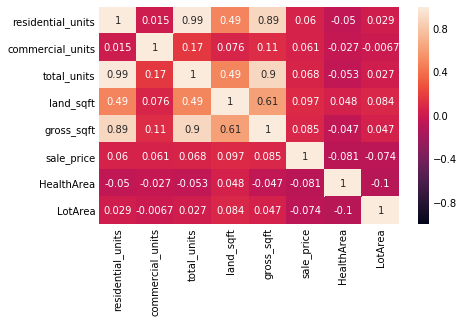

In [94]:
ax = sns.heatmap(bkn_1.corr(), vmin = -1, vmax = 1, annot=True)

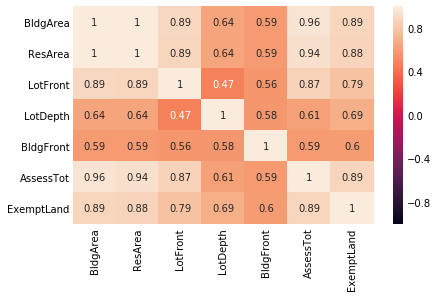

In [95]:
ax = sns.heatmap(bkn_2.corr(), vmin = -1, vmax = 1, annot=True)